In [ ]:
! pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("fka/awesome-chatgpt-prompts")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/170 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['act', 'prompt'],
        num_rows: 170
    })
})

# Loading a custom dataset

You can use the Hugging Face Hub to download datasets, but you’ll often find yourself working with data that is stored either on your laptop or on a remote server.

The Datasets library provides loading scripts to handle the loading of local and remote datasets. It supports several common data formats.

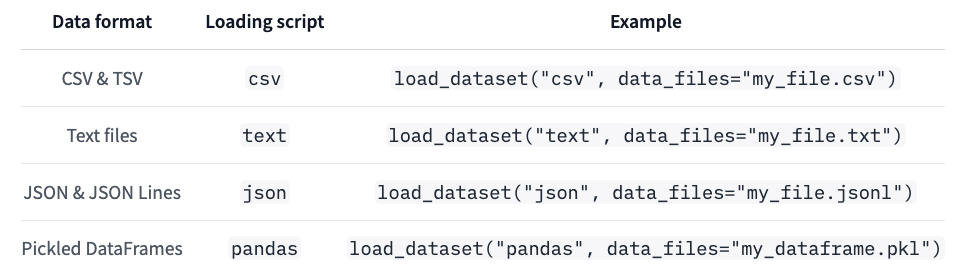

For each data format we just need to specify the type of data format in the `load_dataset()` function, along with a `data_files` argument that specifies the path to one or more files.

## Loading a local CSV dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2024-09-08 11:42:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [  <=>               ] 258.23K  1.04MB/s    in 0.2s    

2024-09-08 11:42:35 (1.04 MB/s) - ‘winequality-white.csv’ saved [264426]



In [ ]:
from datasets import load_dataset

local_csv_dataset = load_dataset("csv", data_files="winequality-white.csv", sep=";")
local_csv_dataset["train"]

Dataset({
    features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
    num_rows: 4898
})

## Load from the Internet

In [ ]:
# Load the dataset from the URL directly
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
remote_csv_dataset = load_dataset("csv", data_files=dataset_url, sep=";")
remote_csv_dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'],
        num_rows: 4898
    })
})

### Raw Text

In [ ]:
dataset_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
text_dataset = load_dataset("text", data_files=dataset_url)

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
text_dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 40000
    })
})

In [ ]:
text_dataset["train"]

Dataset({
    features: ['text'],
    num_rows: 40000
})

In [ ]:
text_dataset["train"][:50]

{'text': ['First Citizen:',
  'Before we proceed any further, hear me speak.',
  '',
  'All:',
  'Speak, speak.',
  '',
  'First Citizen:',
  'You are all resolved rather to die than to famish?',
  '',
  'All:',
  'Resolved. resolved.',
  '',
  'First Citizen:',
  'First, you know Caius Marcius is chief enemy to the people.',
  '',
  'All:',
  "We know't, we know't.",
  '',
  'First Citizen:',
  "Let us kill him, and we'll have corn at our own price.",
  "Is't a verdict?",
  '',
  'All:',
  "No more talking on't; let it be done: away, away!",
  '',
  'Second Citizen:',
  'One word, good citizens.',
  '',
  'First Citizen:',
  'We are accounted poor citizens, the patricians good.',
  'What authority surfeits on would relieve us: if they',
  'would yield us but the superfluity, while it were',
  'wholesome, we might guess they relieved us humanely;',
  'but they think we are too dear: the leanness that',
  'afflicts us, the object of our misery, is as an',
  'inventory to particularise t

### JSONs

In [ ]:
dataset_url = "https://raw.githubusercontent.com/hirupert/sede/main/data/sede/train.jsonl"
json_lines_dataset = load_dataset("json", data_files=dataset_url)
json_lines_dataset["train"][:2]

Generating train split: 0 examples [00:00, ? examples/s]

{'QuerySetId': [466, 784],
 'Title': ['Most controversial posts on the site',
  'Comments asking for questions to be made wiki'],
 'Description': ['Looks for posts with more than half the amount of downvotes as they have upvotes\nOrdered by upvotes\n',
  'All comments that contain the text should and wiki'],
 'QueryBody': ['SELECT \n* from Votes',
  "SELECT  PostId as [Post Link], Text from Comments\nwhere Text like '%should%wiki%'"],
 'CreationDate': [datetime.datetime(2020, 6, 24, 11, 23, 10),
  datetime.datetime(2019, 7, 7, 11, 1, 51)],
 'validated': [False, False]}

If you have more than one split:

In [ ]:
url = "https://rajpurkar.github.io/SQuAD-explorer/dataset/"
data_files = {"train": f"{url}train-v2.0.json", "test": f"{url}dev-v2.0.json"}
json_dataset = load_dataset("json", data_files=data_files, field="data")
json_dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 35
    })
})

# Preprocessing your Data

The dataset library allows you to preprocess your dataset in many ways:

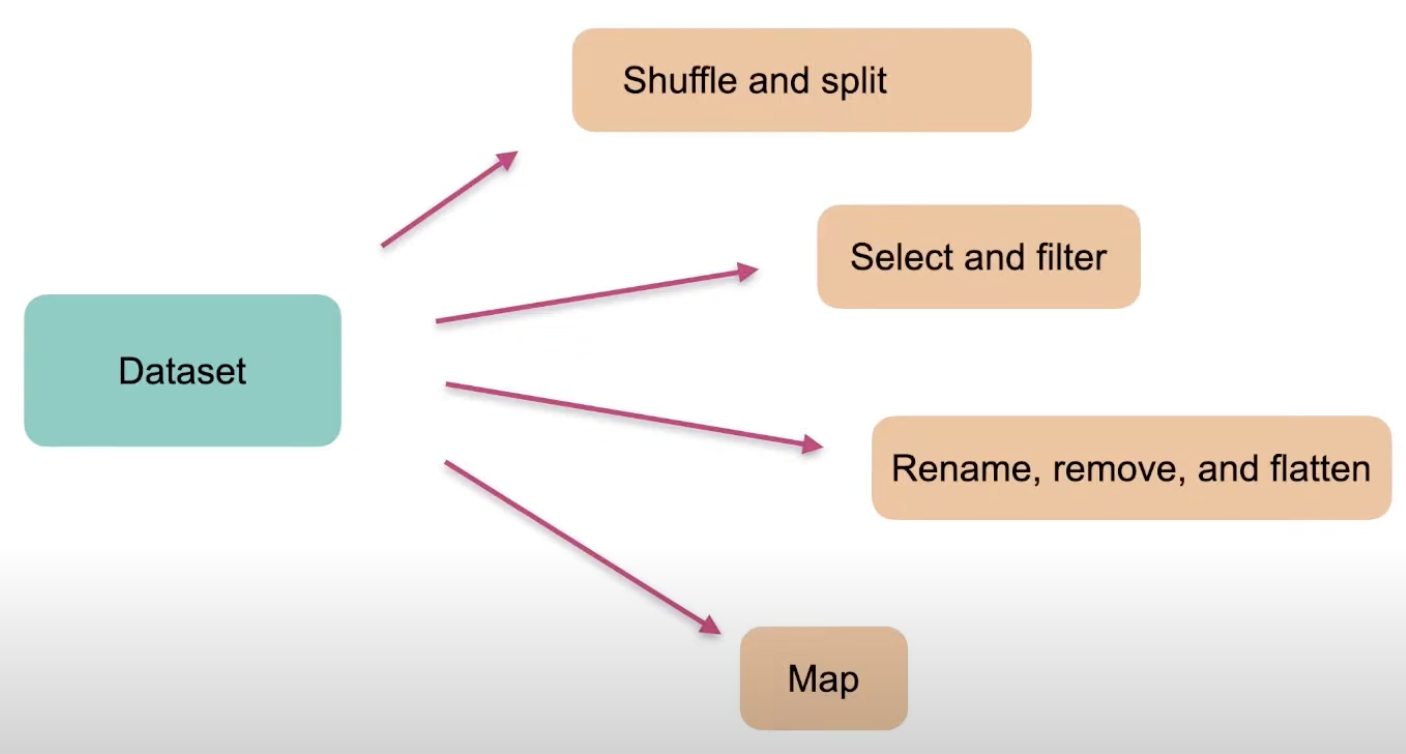

## Shuffle your dataset

Generally a good idea to shuffle your training set so that your model does not learn any artificial ordering of your data.

In [ ]:
from datasets import load_dataset

squad = load_dataset("squad", split="train")
squad[0]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [ ]:
squad_shuffled = squad.shuffle(seed=42)
squad_shuffled[0]

{'id': '573173d8497a881900248f0c',
 'title': 'Egypt',
 'context': 'The Pew Forum on Religion & Public Life ranks Egypt as the fifth worst country in the world for religious freedom. The United States Commission on International Religious Freedom, a bipartisan independent agency of the US government, has placed Egypt on its watch list of countries that require close monitoring due to the nature and extent of violations of religious freedom engaged in or tolerated by the government. According to a 2010 Pew Global Attitudes survey, 84% of Egyptians polled supported the death penalty for those who leave Islam; 77% supported whippings and cutting off of hands for theft and robbery; and 82% support stoning a person who commits adultery.',
 'question': 'What percentage of Egyptians polled support death penalty for those leaving Islam?',
 'answers': {'text': ['84%'], 'answer_start': [468]}}

# Dataset Splits

Think of this as another way to shuffle your data.

In [ ]:
help(squad.train_test_split)

In [ ]:
dataset = squad_shuffled.train_test_split(test_size=0.1, seed=42)
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 78839
    })
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 8760
    })
})

## The `select` Method

Expects an input of a list or a generator of indices and returns a Dataset object containing the subset of just those rows.

In [ ]:
indices = [0, 10, 20, 40, 80]
type(squad[indices])

dict

**NOTICE the difference between the output data type.**

In [ ]:
indices = [0, 10, 20, 40, 80]
examples = squad.select(indices)
examples

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 5
})

Another quick usecase of select is to create a random sample of rows (when combined with `shuffle`).

In [ ]:
sample = squad.shuffle().select(range(5))
sample

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 5
})

## The `filter` method

Returns rows that match a condition(s).

In [ ]:
def startsWithL(x):
  if x["title"].startswith("L"):
    return True
  else:
    return False

In [ ]:
squad_filtered = squad.filter(startsWithL)
squad_filtered

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 2049
})

In [ ]:
# same
squad_filtered = squad.filter(lambda x : x["title"].startswith("L"))
squad_filtered[0]

Filter:   0%|          | 0/87599 [00:00<?, ? examples/s]

{'id': '56de0fef4396321400ee2583',
 'title': 'Lighting',
 'context': 'Lighting or illumination is the deliberate use of light to achieve a practical or aesthetic effect. Lighting includes the use of both artificial light sources like lamps and light fixtures, as well as natural illumination by capturing daylight. Daylighting (using windows, skylights, or light shelves) is sometimes used as the main source of light during daytime in buildings. This can save energy in place of using artificial lighting, which represents a major component of energy consumption in buildings. Proper lighting can enhance task performance, improve the appearance of an area, or have positive psychological effects on occupants.',
 'question': 'What is used a main source of light for a building during the day?',
 'answers': {'text': ['Daylighting'], 'answer_start': [245]}}

In [ ]:
# function chaining is something we can use effectively!
squad.filter(startsWithL).shuffle(seed=42).select(range(5))

## Column Transformations

Rename Columns

In [ ]:
help(squad.rename_column)

In [ ]:
# works on one column at a time only; does not work inplace, explicit assignment is required
squad = squad.rename_column("context", "passages").rename_column("id", "index").rename_column("question", "query")

Remove Columns

In [ ]:
squad.remove_columns(["index", "title"])

Dataset({
    features: ['passages', 'query', 'answers'],
    num_rows: 87599
})

Flatten nested columns in to separate columns

In [ ]:
from datasets import load_dataset

squad = load_dataset("squad", split="train")
squad

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers'],
    num_rows: 87599
})

In [ ]:
squad[0]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [ ]:
squad.flatten()[0]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers.text': ['Saint Bernadette Soubirous'],
 'answers.answer_start': [515]}

# The `map` method

Applies a (custom) processing function to each row in the Dataset.

In [ ]:
def lowercase_title(example):
    return {"title": example["title"].lower()}

squad_lowercase = squad.map(lowercase_title)
# Peek at random sample
squad_lowercase.shuffle(seed=42)["title"][:5]

Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

['egypt',
 'ann_arbor,_michigan',
 'rule_of_law',
 'samurai',
 'group_(mathematics)']

The `map` method can also be applied on batches of rows.

This is, especially, useful for tokenization. The `AutoTokenizer` library, for instance, can do multi-threading and parallelization for faster results.

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_title(example):
    return tokenizer(example["title"])

squad.map(tokenize_title, batched=True, batch_size=500)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/87599 [00:00<?, ? examples/s]

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers', 'input_ids', 'attention_mask'],
    num_rows: 87599
})

## Creating new columns


In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip"
!unzip drugsCom_raw.zip

--2024-09-06 09:03:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [        <=>         ]  41.00M  26.8MB/s    in 1.5s    

2024-09-06 09:03:47 (26.8 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [ ]:
from datasets import load_dataset

data_files = {"train": "drugsComTrain_raw.tsv", "test": "drugsComTest_raw.tsv"}
# \t is the tab character in Python
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
drug_dataset = drug_dataset.remove_columns("Unnamed: 0")

In [ ]:
def compute_review_length(example):
    return {"review_length": len(example["review"].split())}

In [ ]:
drug_dataset = drug_dataset.map(compute_review_length)
# Inspect the first training example
drug_dataset["train"][0]

Map:   0%|          | 0/161297 [00:00<?, ? examples/s]

Map:   0%|          | 0/53766 [00:00<?, ? examples/s]

{'drugName': 'Valsartan',
 'condition': 'Left Ventricular Dysfunction',
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'rating': 9.0,
 'date': 'May 20, 2012',
 'usefulCount': 27,
 'review_length': 17}

As expected, we can see a review_length column has been added to our training set. We can sort this new column with `Dataset.sort()` to see what the extreme values look like:

In [ ]:
drug_dataset["train"].sort("review_length")[:3]

{'drugName': ['Ledipasvir / sofosbuvir',
  'Amphetamine / dextroamphetamine',
  'Alesse'],
 'condition': ['Hepatitis C', 'ADHD', 'Birth Control'],
 'review': ['"Headache"', '"Great"', '"Awesome"'],
 'rating': [10.0, 10.0, 10.0],
 'date': ['February 3, 2015', 'October 20, 2009', 'November 23, 2015'],
 'usefulCount': [41, 3, 0],
 'review_length': [1, 1, 1]}

## From `Datasets` to `DataFrames` and back

Although the processing functions of `Datasets` will cover most of your model training needs, there may be times when you’ll need to switch to Pandas to access more powerful features, like `DataFrame.groupby()` or high-level APIs for visualization. Fortunately, `Datasets` is designed to be interoperable with libraries such as Pandas, NumPy, PyTorch, TensorFlow, and JAX. Let’s take a look at how this works.



To enable the conversion between various third-party libraries, `Datasets` provides a `Dataset.set_format()` function. This function only changes the output format of the dataset, so you can easily switch to another format without affecting the underlying data format, which is Apache Arrow. The formatting is done in place. To demonstrate, let’s convert our dataset to Pandas:

In [ ]:
from datasets import load_dataset

dataset = load_dataset("swiss_judgment_prediction", "all", split="train")
dataset[0]

The repository for swiss_judgment_prediction contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/swiss_judgment_prediction.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/59709 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8208 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/17357 [00:00<?, ? examples/s]

{'id': 2,
 'year': 2000,
 'text': 'A.- Der 1955 geborene V._ war seit 1. September 1986 hauptberuflich als technischer Kaufmann bei der Firma A._ AG tätig und im Rahmen einer Nebenbeschäftigung (Nachtarbeit) ab Mai 1990 bei einem Bewachungsdienst angestellt gewesen, als er am 10. Februar 1991 in Norwegen beim Hundeschlittenfahren eine Muskelruptur im Bereich des linken Oberschenkels erlitt. Die Verletzung wurde am 26. Februar 1991 mittels Muskelnaht operativ versorgt (Bericht des Dr. med. B._, Oberarzt, Chirurgische Klinik X._ vom 28. Februar 1991). Beweglichkeits- und Sensibilitätsausfälle führten zum Beizug des Dr. med. W._, Spezialarzt FMH Neurologie, welcher eine Ischiadicusparese links, wahrscheinlich traumatisch bedingt, diagnostizierte (Bericht vom 5. März 1991). Dr. med. S._, Spezialarzt für Chirurgie FMH, Chefarzt Spital X._ (Bericht vom 28. Oktober 1992) bestätigte, dass es bei der Operation vom 10. Februar 1991 zu einer Druckschädigung des Ischiasnerv gekommen sei. Bei Verso

In [ ]:
# Convert the output format to pandas.DataFrame, it happens inplace
dataset.set_format("pandas")
dataset[0]

id  year                                               text  label  \
0   2  2000  A.- Der 1955 geborene V._ war seit 1. Septembe...      0   

  language  region canton     legal area source_language  
0       de  Zürich     zh  insurance law             n/a

In [ ]:
type(dataset)

datasets.arrow_dataset.Dataset

Or, you can use the `to_pandas` method to change the data.

In [ ]:
df = dataset.to_pandas()
df.head()

id  year                                               text  label  \
0   2  2000  A.- Der 1955 geborene V._ war seit 1. Septembe...      0   
1   3  2000  Ansprüche nach OHG, hat sich ergeben: A.- X._ ...      1   
2   4  2000  Art. 4 aBV (Strafverfahren wegen falschen Zeug...      0   
3   5  2000  Art. 5 Ziff. 1 EMRK (Haftentlassung), hat sich...      1   
4   6  2000  Mietvertrag, hat sich ergeben: A.- Die CT Cond...      0   

  language                    region canton     legal area source_language  
0       de                    Zürich     zh  insurance law             n/a  
1       de       Central Switzerland     lu     public law             n/a  
2       de  Northwestern Switzerland     ag     public law             n/a  
3       de                       n/a    n/a     public law             n/a  
4       de                       n/a    n/a      civil law             n/a

In [ ]:
# How are languages distributed across regions?
df.groupby("region")["language"].value_counts()

region                    language
Central Switzerland       de           4778
                          it              1
Eastern Switzerland       de           5650
                          it             57
Espace Mittelland         de           5150
                          fr           3104
                          it              3
Federation                de           1011
                          fr            227
                          it             70
Northwestern Switzerland  de           5654
                          fr              1
Région lémanique          fr          13100
                          de            336
Ticino                    it           2249
                          de              6
Zürich                    de           8785
                          fr              3
n/a                       fr           4744
                          de           4088
                          it            692
Name: count, dtype: int64

In [ ]:
# Which legal area is most common?
df["legal area"].value_counts()

legal area
public law       15173
penal law        11795
civil law        11477
insurance law    11142
social law        9727
other              395
Name: count, dtype: int64

Just remember to reset the format when you are finished, otherwise you may see errors!

In [ ]:
from transformers import AutoTokenizer

# Load a pretrained tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# Tokenize the `text` column
dataset.map(lambda x : tokenizer(x["text"]))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/59709 [00:00<?, ? examples/s]

ValueError: text input must be of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [ ]:
# Reset format
dataset.reset_format()
# Now we can tokenize!
dataset.map(lambda x : tokenizer(x["text"]))

Map:   0%|          | 0/59709 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1446 > 512). Running this sequence through the model will result in indexing errors


Dataset({
    features: ['id', 'year', 'text', 'label', 'language', 'region', 'canton', 'legal area', 'source_language', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 59709
})

# Saving & Loading a Dataset

The Datasets library will cache every downloaded dataset and the operations performed on it.

The cache allows Dataset library to avoid re-downloading or re-processing the entire dataset (which is a good thing).

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("allocine")
raw_datasets.cache_files # each split will have a filename.

Generating train split:   0%|          | 0/160000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/20000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/20000 [00:00<?, ? examples/s]

{'train': [{'filename': '/root/.cache/huggingface/datasets/allocine/allocine/0.0.0/a4654f4896408912913a62ace89614879a549287/allocine-train.arrow'}],
 'validation': [{'filename': '/root/.cache/huggingface/datasets/allocine/allocine/0.0.0/a4654f4896408912913a62ace89614879a549287/allocine-validation.arrow'}],
 'test': [{'filename': '/root/.cache/huggingface/datasets/allocine/allocine/0.0.0/a4654f4896408912913a62ace89614879a549287/allocine-test.arrow'}]}

Alternatively, you can store your dataset in a different location and format.

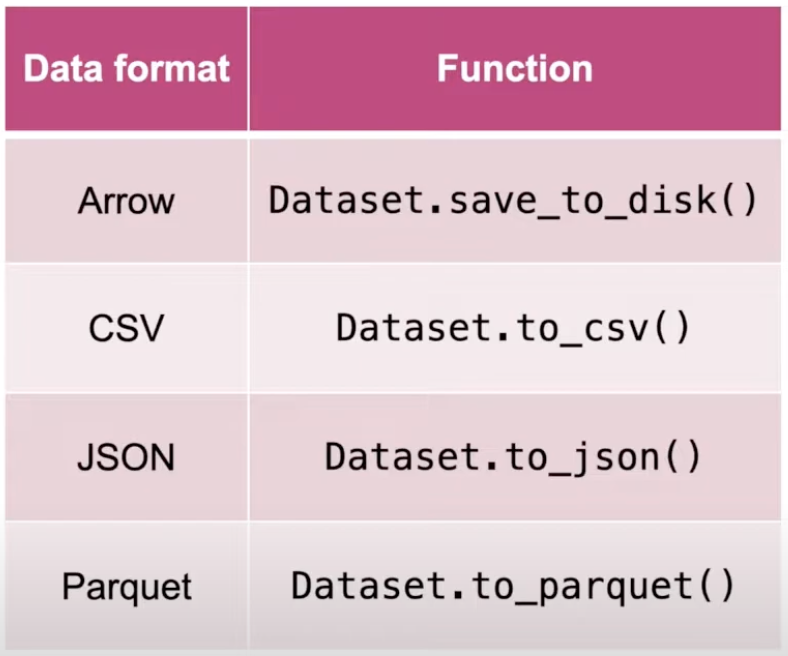

CSV and JSON formats are good for small to medium sized datasets.
For huge datasets, use parquet or arrow formats.

When you save to arrow format (which is the default format), each split and its metadata is stored in a separate directory.

In [ ]:
raw_datasets.save_to_disk("my-arrow-datasets")

Saving the dataset (0/1 shards):   0%|          | 0/160000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/20000 [00:00<?, ? examples/s]

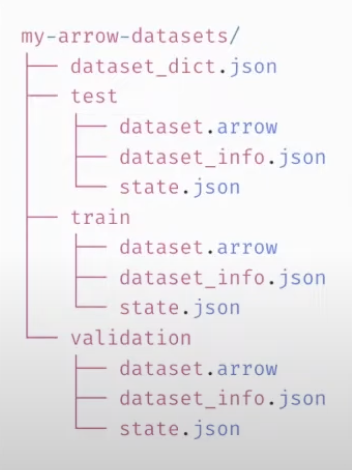

In [ ]:
from datasets import load_from_disk

arrow_datasets_reloaded = load_from_disk("my-arrow-datasets")
arrow_datasets_reloaded

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 160000
    })
    validation: Dataset({
        features: ['review', 'label'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['review', 'label'],
        num_rows: 20000
    })
})

For the CSV format, we have to store each split as a separate file. One way to do this is by iterating over the keys and values in the `DatasetDict` object:

In [ ]:
for split, dataset in raw_datasets.items():
    dataset.to_csv(f"my-dataset-{split}.csv", index=None)

Creating CSV from Arrow format:   0%|          | 0/160 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating CSV from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Use the `load_dataset` with the `data_files` parameter to load:

In [ ]:
data_files = {
    "train": "my-dataset-train.csv",
    "validation": "my-dataset-validation.csv",
    "test": "my-dataset-test.csv",
}

csv_datasets_reloaded = load_dataset("csv", data_files=data_files)
csv_datasets_reloaded

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 160000
    })
    validation: Dataset({
        features: ['review', 'label'],
        num_rows: 20000
    })
    test: Dataset({
        features: ['review', 'label'],
        num_rows: 20000
    })
})

Similar approaches for JSONs and Parquets:

In [ ]:
# Save in JSON Lines format
for split, dataset in raw_datasets.items():
    dataset.to_json(f"my-dataset-{split}.jsonl")

# Save in Parquet format
for split, dataset in raw_datasets.items():
    dataset.to_parquet(f"my-dataset-{split}.parquet")

Creating json from Arrow format:   0%|          | 0/160 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating json from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/160 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

Creating parquet from Arrow format:   0%|          | 0/20 [00:00<?, ?ba/s]

In [ ]:
json_data_files = {
    "train": "my-dataset-train.jsonl",
    "validation": "my-dataset-validation.jsonl",
    "test": "my-dataset-test.jsonl",
}

parquet_data_files = {
    "train": "my-dataset-train.parquet",
    "validation": "my-dataset-validation.parquet",
    "test": "my-dataset-test.parquet",
}

# Reload with the `json` script
json_datasets_reloaded = load_dataset("json", data_files=json_data_files)
# Reload with the `parquet` script
parquet_datasets_reloaded = load_dataset("parquet", data_files=parquet_data_files)

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]